<a href="https://colab.research.google.com/github/thimotyb/real-world-machine-learning/blob/python3/pandas_advanced_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas - Advanced Techniques

This lesson is taken and optimized from the following web sources:

1.   https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086
2.   https://colab.research.google.com/github/thimotyb/real-world-machine-learning/blob/python3/Importing_data_with_pandas.ipynb
3.   https://nvie.com/posts/iterators-vs-generators/
4.   https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
5.   https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html







## Data Types

let’s quickly summarize all the available Pandas data types. In total, there are seven types:
* object : This data type is used for strings (i.e., sequences of characters)
* int64 : Used for integers (whole numbers, no decimals)
* float64 : Used for floating-point numbers (i.e., figures with decimals/fractions)
* bool : Used for values that can only be True/False
* datetime64 : Used for date and time values
* timedelta : Used to represent the difference between datetimes
* category : Used for values that take one out of a limited number of available options (categories don’t have to, but can have explicit ordering)

In [2]:
import pandas as pd
import numpy as np
import datetime
import pytz
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/happiness_with_continent.csv')

In [64]:
invoices = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/invoices.csv')

In [ ]:
invoices.tail(5)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
50012,4OMS8ZSA0UX8LHWI,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 08:00:00+02:00,['Regina Shirley'],9,Breakfast,False
50013,RR0VKJN8V0KHNKGG,2018-03-19,22EX9VZSJKHP4AIP,E4K99D4JR9E40VE1,2018-03-18 09:00:00+01:00,['Robin Ramos' 'Chester Mortimer'],25,Breakfast,False
50014,STJ6QJC30WPRM93H,2017-09-21,LMX18PNGWCIMG1QW,E4K99D4JR9E40VE1,2017-09-22 21:00:00+02:00,['Robin Ramos'],160,Dinner,False
50015,QHEUIYNC0XQX7GDR,2018-01-28,4U0VH2TGQL30X23X,E4K99D4JR9E40VE1,2018-02-01 21:00:00+01:00,['Chester Mortimer' 'Robin Ramos'],497,Dinner,False
50016,NKHFWT5I2J9LPAPG,2017-09-06,ORWFRT5TUSYGNYG7,E4K99D4JR9E40VE1,2017-09-09 14:00:00+02:00,['Chester Mortimer' 'Robin Ramos'],365,Lunch,False


In [ ]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Id           50017 non-null  object 
 1   Date               50017 non-null  object 
 2   Meal Id            50017 non-null  object 
 3   Company Id         50017 non-null  object 
 4   Date of Meal       50017 non-null  object 
 5   Participants       50017 non-null  object 
 6   Meal Price         50017 non-null  float64
 7   Type of Meal       50017 non-null  object 
 8   Heroes Adjustment  50017 non-null  bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 3.1+ MB


In [ ]:
invoices['Type of Meal'] = invoices['Type of Meal'].astype('category')
invoices['Date'] = invoices['Date'].astype('datetime64[ns]')
invoices['Meal Price'] = invoices['Meal Price'].astype('int')

In [ ]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Id           50017 non-null  object        
 1   Date               50017 non-null  datetime64[ns]
 2   Meal Id            50017 non-null  object        
 3   Company Id         50017 non-null  object        
 4   Date of Meal       50017 non-null  object        
 5   Participants       50017 non-null  object        
 6   Meal Price         50017 non-null  int64         
 7   Type of Meal       50017 non-null  category      
 8   Heroes Adjustment  50017 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), int64(1), object(5)
memory usage: 2.8+ MB


With conversion helpers,  it is possible to specify the behavior in case a value is encountered, that can not be converted.
Both functions accept an additional parameter errors that defines how errors should be treated. We could choose to ignore errors by passingerrors='ignore' , or turn the offending values into np.nan values by passing errors='coerce'. The default behavior is to raise errors.

We create an error and we demonstrate how to handle conversion errors.

In [ ]:
invoices.loc[45612,'Meal Price'] = 'I am causing trouble'
invoices.loc[35612,'Meal Price'] = 'Me too'

In [ ]:
invoices['Meal Price'].astype(int)

ValueError: ignored

In [ ]:
invoices['Meal Price'].apply(lambda x: type(x)).value_counts()

<class 'int'>    50015
<class 'str'>        2
Name: Meal Price, dtype: int64

In [ ]:
# Now this will not work as part is int and part str
invoices['Meal Price'][invoices['Meal Price']<10]

536      8
984      7
1041     7
1528     9
2294     8
        ..
46517    9
47225    9
48936    9
48975    8
50012    9
Name: Meal Price, Length: 100, dtype: int64

In [ ]:
# Conditionally filter by lambda condition
invoices['Meal Price'][invoices['Meal Price'].apply(
  lambda x: isinstance(x,str)
)]

35612                  Me too
45612    I am causing trouble
Name: Meal Price, dtype: object

it would be very reasonable to just convert the values into np.nan by passing errors='coerce' to pd.to_numeric() like this:

In [ ]:
pd.to_numeric(invoices['Meal Price'],errors='coerce')

0        469.0
1         22.0
2        314.0
3        438.0
4        690.0
         ...  
50012      9.0
50013     25.0
50014    160.0
50015    497.0
50016    365.0
Name: Meal Price, Length: 50017, dtype: float64

In [ ]:
invoices.iloc[45612]

Order Id                      SJA1F92KXWZDH398
Date                       2017-02-26 00:00:00
Meal Id                       OOW0UEXQY5RMPPZ8
Company Id                    ICNGUMLKEB27T1P3
Date of Meal         2017-03-02 20:00:00+01:00
Participants                  ['Betty Stroud']
Meal Price                I am causing trouble
Type of Meal                            Dinner
Heroes Adjustment                        False
Name: 45612, dtype: object

In [ ]:
pd.to_numeric(invoices['Meal Price'],errors='coerce')[45612]

nan

In [ ]:
# Fill in the gaps with fillna and median
invoices['Meal Price'] = pd.to_numeric(invoices['Meal Price'],errors='coerce')
invoices['Meal Price'] = invoices['Meal Price'].fillna(invoices['Meal Price'].median())
invoices['Meal Price'].astype(int)

0        469
1         22
2        314
3        438
4        690
        ... 
50012      9
50013     25
50014    160
50015    497
50016    365
Name: Meal Price, Length: 50017, dtype: int64

In [ ]:
print(invoices['Meal Price'].median())
invoices.iloc[45610:45614]

398.0


,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
45610,DMB8H3M3WT8GJSPN,2016-08-20,AOJPWQGKNVDF9UD5,ICNGUMLKEB27T1P3,2016-08-17 21:00:00+02:00,['Betty Stroud'],49.0,Dinner,False
45611,XEEXYOB84AHVCC1J,2018-07-17,63LLVLE72VG2J157,ICNGUMLKEB27T1P3,2018-07-19 20:00:00+02:00,['Alesha Wooten'],891.0,Dinner,False
45612,SJA1F92KXWZDH398,2017-02-26,OOW0UEXQY5RMPPZ8,ICNGUMLKEB27T1P3,2017-03-02 20:00:00+01:00,['Betty Stroud'],398.0,Dinner,False
45613,HC6MTWMXF99YEB92,2018-03-01,II205DMW5FBPTGIX,ICNGUMLKEB27T1P3,2018-03-02 13:00:00+01:00,['Betty Stroud'],245.0,Lunch,False


## Manipulating Date and Time in Pandas

A tutorial on basic python date time standard lib is here:
https://colab.research.google.com/github/thimotyb/materials/blob/master/datetime/datetime_tutorial.ipynb


pd.to_datetime()
Does what the name implies, the method converts a string into a datetime format. To call to_datetime on a column you would do: 
pd.to_datetime(invoices['Date of Meal']). 

Pandas will then guess the format and try to parse the date from the Input. And it does so impressively well:




In [ ]:
print(pd.to_datetime('2019-8-1'))
print(pd.to_datetime('2019/8/1'))
print(pd.to_datetime('8/1/2019'))
print(pd.to_datetime('Aug, 1 2019'))
print(pd.to_datetime('Aug - 1 2019'))
print(pd.to_datetime('August - 1 2019'))
print(pd.to_datetime('2019, August - 1'))
print(pd.to_datetime('20190108'))

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-01-08 00:00:00


In [ ]:
# With an arbitrary format
print(pd.to_datetime('yolo 20190108',format='%Y%d%m', exact=False))

2019-08-01 00:00:00


In [ ]:
invoices['Date of Meal'] = pd.to_datetime(invoices['Date of Meal'],utc=True)

Examples taken from:
https://github.com/pandas-dev/pandas/blob/master/doc/source/user_guide/timeseries.rst

pandas captures 4 general time related concepts:

* Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.
* Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.
* Time spans: A span of time defined by a point in time and its associated frequency.
* Date offsets: A relative time duration that respects calendar arithmetic. Similar to dateutil.relativedelta.relativedelta from the dateutil package.

In [6]:
# Generate fixed time series
dti = pd.date_range("2018-01-01", periods=3, freq="H")
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [7]:
idx = pd.date_range("2018-01-01", periods=5, freq="H")
ts = pd.Series(range(len(idx)), index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [14]:
# Date and Time arithmetics
friday = pd.Timestamp("2018-01-05")
print(friday.day_name())
# Add 1 day
saturday = friday + pd.Timedelta("1 day")
print(saturday.day_name())
# Add 1 business day (Friday --> Monday)
monday = friday + pd.offsets.BDay() # Defaults to 1
print(monday.day_name())

Friday
Saturday
Tuesday


In [15]:
# Timestamps and Periods
dates = [
       pd.Timestamp("2012-05-01"),
       pd.Timestamp("2012-05-02"),
       pd.Timestamp("2012-05-03"),
]
ts = pd.Series(np.random.randn(3), dates)

print(type(ts.index))
print(ts.index)

print(ts)

periods = [pd.Period("2012-01"), pd.Period("2012-02"), pd.Period("2012-03")]

ts = pd.Series(np.random.randn(3), periods)

print(type(ts.index))
print(ts.index)

print(ts)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)
2012-05-01    0.370727
2012-05-02    0.237339
2012-05-03    0.133812
dtype: float64
<class 'pandas.core.indexes.period.PeriodIndex'>
PeriodIndex(['2012-01', '2012-02', '2012-03'], dtype='period[M]', freq='M')
2012-01    0.275041
2012-02    0.350740
2012-03    0.403516
Freq: M, dtype: float64


In [16]:
# Using ranges as indexes (more compact)
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2012, 1, 1)

index = pd.date_range(start, end)
print(index)

index = pd.bdate_range(start, end)
print(index)


DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-12-23', '2011-12-24', '2011-12-25', '2011-12-26',
               '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30',
               '2011-12-31', '2012-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')
DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2011-12-19', '2011-12-20', '2011-12-21', '2011-12-22',
               '2011-12-23', '2011-12-26', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=260, freq='B')


In [17]:
pd.date_range(start, periods=1000, freq="M")

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2093-07-31', '2093-08-31', '2093-09-30', '2093-10-31',
               '2093-11-30', '2093-12-31', '2094-01-31', '2094-02-28',
               '2094-03-31', '2094-04-30'],
              dtype='datetime64[ns]', length=1000, freq='M')

In [18]:
pd.bdate_range(start, periods=250, freq="BQS") # Business Quarter Start frequency

DatetimeIndex(['2011-01-03', '2011-04-01', '2011-07-01', '2011-10-03',
               '2012-01-02', '2012-04-02', '2012-07-02', '2012-10-01',
               '2013-01-01', '2013-04-01',
               ...
               '2071-01-01', '2071-04-01', '2071-07-01', '2071-10-01',
               '2072-01-01', '2072-04-01', '2072-07-01', '2072-10-03',
               '2073-01-02', '2073-04-03'],
              dtype='datetime64[ns]', length=250, freq='BQS-JAN')

In [20]:
# Custom calendars (holidays) and ranges
weekmask = "Mon Wed Fri"

holidays = [datetime.datetime(2011, 1, 5), datetime.datetime(2011, 3, 14)]

pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)
# Jan 5 2011 not listed because it is a custom holiday

DatetimeIndex(['2011-01-03', '2011-01-07', '2011-01-10', '2011-01-12',
               '2011-01-14', '2011-01-17', '2011-01-19', '2011-01-21',
               '2011-01-24', '2011-01-26',
               ...
               '2011-12-09', '2011-12-12', '2011-12-14', '2011-12-16',
               '2011-12-19', '2011-12-21', '2011-12-23', '2011-12-26',
               '2011-12-28', '2011-12-30'],
              dtype='datetime64[ns]', length=154, freq='C')

In [31]:
# Creating a calendar class
from pandas.tseries.holiday import (
        Holiday,
        USMemorialDay,
        AbstractHolidayCalendar,
        nearest_workday,
        Day,
)

class ExampleCalendar(AbstractHolidayCalendar):
    rules = [
        USMemorialDay,
        Holiday("July 4th", month=7, day=4, observance=nearest_workday),
        # Easter on 2021 was Apr, 4th, good monday is one day later
        Holiday('Good Monday', month=1, day=1, offset=[Easter(), Day()]),
    ]

cal = ExampleCalendar()
# List the holidays on this calendar
cal.holidays(datetime.datetime(2021, 1, 1), datetime.datetime(2021, 12, 31))

DatetimeIndex(['2021-04-05', '2021-05-31', '2021-07-05'], dtype='datetime64[ns]', freq=None)

In [34]:
# Shifting and lagging, slicing on time
rng = pd.date_range("2012-01-01", "2012-01-10")
ts = pd.Series(range(len(rng)), index=rng)
ts = ts[:5]
ts.shift(1)

2012-01-01    NaN
2012-01-02    0.0
             ... 
2012-01-04    2.0
2012-01-05    3.0
Freq: D, Length: 5, dtype: float64

In [35]:
# shift 5 months at business end
# When freq is specified, shift method changes all the dates in the index rather than changing the alignment of the data and the index:
ts.shift(5, freq="BM")

2012-05-31    0
2012-05-31    1
             ..
2012-05-31    3
2012-05-31    4
Length: 5, dtype: int64

In [40]:
# Frequency conversion
pd.set_option('display.max_rows', 10) # to print all 10 instances after freq conversion
print(pd.Timestamp("1/1/2010").day_name())
dr = pd.date_range("1/1/2010", periods=3, freq=3 * pd.offsets.BDay())
ts = pd.Series(np.random.randn(3), index=dr)
print(ts)
print('---')
print(ts.asfreq(pd.offsets.BDay()))

Friday
2010-01-01    0.390461
2010-01-06    2.409988
2010-01-11    0.417015
Freq: 3B, dtype: float64
---
2010-01-01    0.390461
2010-01-04         NaN
2010-01-05         NaN
2010-01-06    2.409988
2010-01-07         NaN
2010-01-08         NaN
2010-01-11    0.417015
Freq: B, dtype: float64


In [41]:
# With interpolation method
ts.asfreq(pd.offsets.BDay(), method="pad")

2010-01-01    0.390461
2010-01-04    0.390461
2010-01-05    0.390461
2010-01-06    2.409988
2010-01-07    2.409988
2010-01-08    2.409988
2010-01-11    0.417015
Freq: B, dtype: float64

In [44]:
# Resampling
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts)
print('---')
print(ts.resample("1Min").sum())

2012-01-01 00:00:00    390
2012-01-01 00:00:01    446
2012-01-01 00:00:02    167
2012-01-01 00:00:03    138
2012-01-01 00:00:04    211
                      ... 
2012-01-01 00:01:35    438
2012-01-01 00:01:36    301
2012-01-01 00:01:37    153
2012-01-01 00:01:38     44
2012-01-01 00:01:39    446
Freq: S, Length: 100, dtype: int64
---
2012-01-01 00:00:00    15665
2012-01-01 00:01:00    10984
Freq: T, dtype: int64


In [46]:
# Different aggregators and labeling
ts.resample("1Min").mean()

2012-01-01 00:00:00    261.083333
2012-01-01 00:01:00    274.600000
Freq: T, dtype: float64

In [47]:
# Open High Low Close
ts.resample("1Min").ohlc()

,open,high,low,close
2012-01-01 00:00:00,390,495,19,148
2012-01-01 00:01:00,327,499,12,446


In [48]:
# Upsampling
# from secondly to every 250 milliseconds
ts[:2].resample("250L").asfreq()

2012-01-01 00:00:00.000    390.0
2012-01-01 00:00:00.250      NaN
2012-01-01 00:00:00.500      NaN
2012-01-01 00:00:00.750      NaN
2012-01-01 00:00:01.000    446.0
Freq: 250L, dtype: float64

In [49]:
ts[:2].resample("250L").ffill()

2012-01-01 00:00:00.000    390
2012-01-01 00:00:00.250    390
2012-01-01 00:00:00.500    390
2012-01-01 00:00:00.750    390
2012-01-01 00:00:01.000    446
Freq: 250L, dtype: int64

## Accessors

 a property that acts as an interface to methods specific to the type you are trying to access. Those methods are highly specialized. They serve one job and one job only. However, they are excellent and extremely concise for that particular job.
There are three different accessors:
* dt
* str
* cat

In [9]:
pd.set_option('display.max_rows', 4)

### dt

In [10]:
invoices['Date of Meal'].dt.date

NameError: ignored

In [ ]:
invoices['Date of Meal'].dt.weekday

In [ ]:
invoices['Date of Meal'].dt.month

In [ ]:
invoices['Date of Meal'].dt.isocalendar().week

In [ ]:
invoices['Date of Meal'].dt.is_month_end
# also available: is_leap_year, is_month_start, is_month_end, is_quarter_start, is_quarter_end, is_year_start, is_year_end

In [ ]:
invoices[invoices['Date of Meal'].dt.is_month_end]

In [ ]:
# converts the Pandas datetime into a regular Python datetime format 
invoices['Date of Meal'].dt.to_pydatetime()

In [ ]:
# to period [available periods are W, M, Q, and Y], which converts the dates into periods.
invoices['Date of Meal'].dt.to_period('W')

### str

In [ ]:
pd.set_option('display.max_rows', 10)
invoices['Type of Meal'].str.lower()

In [ ]:
invoices['Type of Meal'].str.ljust(width=15)

In [ ]:
invoices['Type of Meal'].str.zfill(width=15)

In [ ]:

invoices['Type of Meal'].str.repeat(2)

In [ ]:
invoices['Type of Meal'].str.endswith('ast')

In [ ]:
invoices[invoices['Participants'].str.contains('Bruce')]

### *cat*

For categorical operations

In [ ]:
invoices['Type of Meal'].cat.ordered

In [ ]:
invoices['Type of Meal'].cat.categories

In [ ]:
invoices['Type of Meal'].cat.codes

# Combining Dataframes

## Concat

In [50]:
# Concatenating
invoices['Date of Meal'].dt.year.value_counts().sort_index()

NameError: ignored

In [ ]:
y_2013 = invoices[invoices['Date of Meal'].dt.year == 2013].copy()
y_2014 = invoices[invoices['Date of Meal'].dt.year == 2014].copy()
y_2015 = invoices[invoices['Date of Meal'].dt.year == 2015].copy()
y_2016 = invoices[invoices['Date of Meal'].dt.year == 2016].copy()
y_2017 = invoices[invoices['Date of Meal'].dt.year == 2017].copy()
y_2018 = invoices[invoices['Date of Meal'].dt.year == 2018].copy()
y_2019 = invoices[invoices['Date of Meal'].dt.year == 2019].copy()

In [ ]:
y_2016

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
9,FESGKOQN2OZZWXY3,2016-01-10,US0NQYNNHS1SQJ4S,36MFTZOYMTAJP1RK,2016-01-14 21:00:00+00:00,['Glenn Gould' 'Amanda Knowles' 'Ginger Hoagla...,451.0,Dinner,False
10,YITOTLOF0MWZ0VYX,2016-10-03,RGYX8772307H78ON,36MFTZOYMTAJP1RK,2016-10-01 20:00:00+00:00,['Ginger Hoagland' 'Amanda Knowles' 'Michael W...,263.0,Dinner,False
12,TH60C9D8TPYS7DGG,2016-12-15,KDSMP2VJ22HNEPYF,36MFTZOYMTAJP1RK,2016-12-13 07:00:00+00:00,['Cheryl Feaster' 'Bret Adams' 'Ginger Hoagland'],755.0,Breakfast,False
14,WKB58Q8BHLOFQAB5,2016-08-31,E2K2TQUMENXSI9RP,36MFTZOYMTAJP1RK,2016-09-03 12:00:00+00:00,['Michael White' 'Ginger Hoagland' 'Bret Adams'],502.0,Lunch,False
...,...,...,...,...,...,...,...,...,...
50003,VC858QHD5EW99MYD,2016-12-25,95XY29BUWLB0UEQR,FC1LJXHNH2883N3Y,2016-12-23 11:00:00+00:00,['Jon Ponce'],45.0,Lunch,False
50005,WQ9O30HM7Z20CX11,2016-08-26,R3CY4BU2QN5ZVMC0,FC1LJXHNH2883N3Y,2016-08-27 07:00:00+00:00,['Jerry Nelson' 'Alice Allen'],342.0,Breakfast,False
50008,UHIE76EGIC2KFP34,2016-08-06,BFLY4LHHUI5OIREM,FC1LJXHNH2883N3Y,2016-08-08 06:00:00+00:00,['Jerry Nelson'],164.0,Breakfast,False
50009,FWH3N8N5ARW53BE6,2016-03-17,WHVI4J3J388I8I4B,FC1LJXHNH2883N3Y,2016-03-12 08:00:00+00:00,['Jon Ponce' 'Alice Allen'],523.0,Breakfast,False


In [ ]:
pd.concat(
    [y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019],
    keys=[13,14,15,16,17,18,19],
    names=['year','original_index']
)

Order Id       Date           Meal Id  \
year original_index                                                  
13   1449            HH1CUKNKIIK87D4L 2014-01-03  M4QG9N01E25U3A53   
     4256            KFXTYDP0YG9C6AZF 2014-01-03  RUMIZCB9KM3N57BN   
     4747            D5NR6EP8NQZ0TGW6 2014-01-05  5GDXSLG0F4WA3JEZ   
     5097            2T71YISMHMPBKE3Z 2014-01-03  0C7DIKEPG5KXNRFR   
     5154            V226RP8DLAQQKU51 2014-01-04  6C9WDEPC4Q05WBSR   
...                               ...        ...               ...   
19   33833           IVSKD45PB8FZ0DRT 2018-12-31  6M3DK5ZNSTNHD50B   
     35406           IASPC12JU67ANTA5 2018-12-29  0MJH7DMFHIPI2T81   
     36958           0GNFQ2XTTI56QE1E 2018-12-30  9UPI7YU9WQDSBR1P   
     43534           8YHA5UTWAT7BOC24 2018-12-31  041RWJS7KUFPFVV9   
     48207           J5FBQ0JWGIKWFSCO 2018-12-30  V8HPYOK6H6W5C5WQ   

                           Company Id              Date of Meal  \
year original_index                                               
13   1449            N4BN0GG5XKZV113C 2013-12-31 21:00:00+00:00   
     4256            9FOCJR50GUHXT2S0 2013-12-31 12:00:00+00:00   
     4747            RJ1NLTCTP1COK3YS 2013-12-31 21:00:00+00:00   
     5097            R835HX2AVB1KJJL0 2013-12-30 19:00:00+00:00   
     5154            23B3R2N3LSYQJQMF 2013-12-30 13:00:00+00:00   
...                               ...                       ...   
19   33833           EIX79KCQQWJKLP21 2019-01-04 08:00:00+00:00   
     35406           90KJEJUQ6MQO6NEW 2019-01-02 11:00:00+00:00   
     36958           9IPX1GTNSJJOULSB 2019-01-03 11:00:00+00:00   
     43534           Z19C6Y8F5Q22DMFK 2019-01-03 07:00:00+00:00   
     48207           5AI9YF2ROZIV8QPJ 2019-01-01 06:00:00+00:00   

                                                          Participants  \
year original_index                                                      
13   1449                                             ['Jason Cuevas']   
     4256            ['Robert Hairfield' 'Ray Dowty' 'Adam Bowers' ...   
     4747                                             ['Leta Stevens']   
     5097                                           ['Hunter Marquez']   
     5154            ['Erin Jones' 'Blake Newman' 'John Truett' 'Go...   
...                                                                ...   
19   33833                             ['Bob Fulton' 'Jermaine Rawls']   
     35406                                           ['Ted Pickering']   
     36958                ['John Hightower' 'Adam Hill' 'Betty Sagen']   
     43534                              ['Marva Cormier' 'Amy Boothe']   
     48207                                            ['Pamela Davis']   

                     Meal Price Type of Meal  Heroes Adjustment  
year original_index                                              
13   1449                 546.0       Dinner              False  
     4256                 586.0        Lunch              False  
     4747                 549.0       Dinner              False  
     5097                 338.0       Dinner              False  
     5154                 377.0        Lunch              False  
...                         ...          ...                ...  
19   33833                388.0    Breakfast              False  
     35406                285.0        Lunch              False  
     36958                600.0        Lunch              False  
     43534                377.0    Breakfast              False  
     48207                536.0    Breakfast              False  

[50017 rows x 9 columns]

In [ ]:
# Horizontal stacking
range_a = pd.date_range(
    datetime.datetime(2019,1,2),
    datetime.datetime(2019,1,8)
)
df_a = pd.DataFrame(
    index=range_a, 
    data=np.random.randint(2,10,size=len(range_a)),
    columns=['observations_A']
)

range_b = pd.date_range(
    datetime.datetime(2019,1,5),
    datetime.datetime(2019,1,12)
)

df_b = pd.DataFrame(
    index=range_b, 
    data=np.random.randint(2,10,size=len(range_b)),
    columns=['observations_B']
)

pd.concat([df_a,df_b],axis=1)

,observations_A,observations_B
2019-01-02,5.0,NaN
2019-01-03,2.0,NaN
2019-01-04,4.0,NaN
2019-01-05,4.0,7.0
2019-01-06,7.0,5.0
...,...,...
2019-01-08,7.0,8.0
2019-01-09,NaN,7.0
2019-01-10,NaN,3.0
2019-01-11,NaN,8.0


## Merge

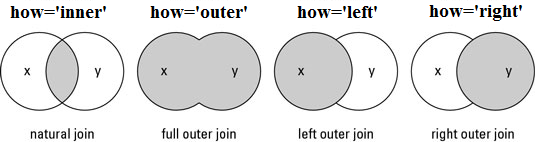

In [53]:
order_data = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/order_leads.csv',parse_dates=[3])
sales_team = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/sales_team.csv')

In [54]:
invoices.head(3)

NameError: ignored

In [55]:

order_data.head(3)

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0


In [56]:
sales_team.head(3)

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,Jessie Mcallister,97UNNAT790E0WM4N,Chimera-Chasing Casbah,LJKS5NK6788CYMUU
1,Jessie Mcallister,97UNNAT790E0WM4N,Tangential Sheds,36MFTZOYMTAJP1RK
2,Jessie Mcallister,97UNNAT790E0WM4N,Two-Mile Grab,H3JRC7XX7WJAD4ZO


No parameters provided: All parameters will use their defaults.
The merge is going to be an inner merge (equivalent to how='inner').
The merge is going to be done on all common columns, i.e., Date, Order Id, and Company Id(equivalent to on=['Date','Order Id','Company Id]).
Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.

In [ ]:

pd.merge(order_data,invoices)

how='left' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='left' which means that we will take all rows from the left frame and only add data from the right frame where we find some.

In [ ]:
pd.merge(order_data,invoices,how='left')

how='right' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='right' which means that we will take all rows from the right frame and only add data from the left frame where we find some. This case is equivalent to 'inner' in our example as every row in the left DataFrame has a corresponding row in the right DataFrame.

In [ ]:
pd.merge(order_data,invoices,how='right')

how='outer' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='outer'. We take all rows from either, the left or the right DataFrame and add corresponding data where we find some in the other DataFrame. This case is equivalent to 'left' in our example as every row in the left DataFrame has a corresponding row in the right DataFrame.

In [ ]:
pd.merge(order_data,invoices,how='outer')

In [ ]:
pd.merge(order_data,invoices,on='Order Id',suffixes=('_base','_join'))

You would typically use the left_on and right_on parameters when the columns are named differently in the two DataFrames.

In [ ]:
pd.merge(
    order_data,
    invoices.rename(columns={'Order Id':'New Id'}),
    left_on='Order Id',
    right_on='New Id'
)

## Map

In [60]:
# Creating a new series from a column, contextually setting the index from another column
lookup = sales_team.set_index("Company Name")['Sales Rep']
lookup

Company Name
Chimera-Chasing Casbah            Jessie Mcallister
Tangential Sheds                  Jessie Mcallister
Two-Mile Grab                     Jessie Mcallister
Three-Men-And-A-Helper Congo'S    Jessie Mcallister
Biophysical Battleground          Jessie Mcallister
                                        ...        
Jammed-Together Stable                Joel Woodbury
Laureate Barbital                     Joel Woodbury
Spotty Adoniram                     Hazel Dickerson
Physicochemical Impatience          Hazel Dickerson
Fierce Productivity                 Hazel Dickerson
Name: Sales Rep, Length: 4725, dtype: object

In [62]:
# Using an indexed series as a mapping function to create new columns
order_data['Sales Rep'] = order_data['Company Name'].map(lookup)
order_data

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,Jessie Mcallister
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,Jessie Mcallister
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,Jessie Mcallister
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,Jessie Mcallister
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,Jessie Mcallister
...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,E4K99D4JR9E40VE1,Fierce Productivity,2015-07-25,4851,0,Hazel Dickerson
99996,K1UP23P8SIY1YION,E4K99D4JR9E40VE1,Fierce Productivity,2015-08-24,7868,0,Hazel Dickerson
99997,NKHFWT5I2J9LPAPG,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-06,5138,0,Hazel Dickerson
99998,OF79M3H9C44UM6PO,E4K99D4JR9E40VE1,Fierce Productivity,2015-10-29,2036,0,Hazel Dickerson


# Reshaping Dataframes

## Transpose

In [65]:
# Transpose
invoices.head(5)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [66]:
invoices.head(5).T

,0,1,2,3,4
Order Id,839FKFW2LLX4LMBB,97OX39BGVMHODLJM,041ORQM5OIHTIU6L,YT796QI18WNGZ7ZJ,6YLROQT27B6HRF4E
Date,2016-05-27,2018-09-27,2014-08-24,2014-04-12,2015-07-28
Meal Id,INBUX904GIHI8YBD,J0MMOOPP709DIDIE,E4UJLQNCI16UX5CS,C9SDFHF7553BE247,48EQXS6IHYNZDDZ5
Company Id,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU
Date of Meal,2016-05-31 07:00:00+02:00,2018-10-01 20:00:00+02:00,2014-08-23 14:00:00+02:00,2014-04-07 21:00:00+02:00,2015-07-27 14:00:00+02:00
Participants,['David Bishop'],['David Bishop'],['Karen Stansell'],['Addie Patino'],['Addie Patino' 'Susan Guerrero']
Meal Price,469,22,314,438,690
Type of Meal,Breakfast,Dinner,Lunch,Dinner,Lunch
Heroes Adjustment,False,False,False,False,False


## Pivot

In [71]:
pd.pivot_table(
    invoices,
    index=['Company Id','Type of Meal'],
    values='Meal Price',
    aggfunc=np.mean,
    margins=True
)

Meal Price
Company Id       Type of Meal            
007RF0BCBVMXTL80 Breakfast     301.666667
                 Dinner        453.000000
                 Lunch         112.000000
00CVEIVO8C92FFBO Breakfast     346.500000
                 Dinner        425.000000
...                                   ...
ZZY3WSHGJWPKJBCV Lunch         511.333333
ZZYB9JLJKXRH7U6O Breakfast     729.000000
                 Dinner        336.000000
                 Lunch         149.000000
All                            403.256713

[13802 rows x 1 columns]

In [72]:
pd.pivot_table(
    invoices,
    index=['Company Id'],
    columns=['Type of Meal'],
    values='Meal Price',
    aggfunc=np.mean,
    margins=True
)

Type of Meal,Breakfast,Dinner,Lunch,All
Company Id,,,,
007RF0BCBVMXTL80,301.666667,453.000000,112.000000,373.500000
00CVEIVO8C92FFBO,346.500000,425.000000,426.428571,403.285714
00OFNRZV8983KC3L,571.500000,665.333333,357.000000,550.428571
00R1H0DBLAVXHOTZ,778.000000,332.333333,694.200000,582.888889
00WJ866YXWT58K2S,392.166667,342.666667,383.600000,378.500000
...,...,...,...,...
ZZ99YI36NDHV7ELT,672.000000,341.000000,401.200000,504.000000
ZZD813K8WK65MND6,339.000000,82.000000,276.333333,250.000000
ZZY3WSHGJWPKJBCV,448.571429,351.428571,511.333333,419.647059
